# <center> Numerical Physics with Probabilities: Fitting and Regression

    
    
<center> Department of Physics, University of Surrey module: Energy, Entropy and Numerical Physics (PHY2063)

## Table of Contents:

* [Numerical Physics part of Energy, Entropy and Numerical Physics](#EENP-intro)
* [An Introduction to Fitting Techniques](#fitting-intro)
* [Regression](#regression)
* [Task 1](#Task-1)
* [Is this fitting function a reasonable choice?](#fitting-choice)
* [More Complex Regression - Fitting to a Gaussian](#gauss-fitting)

#### Learning Objectives:
> Revise basic fitting techniques (method of least squares)

> Introduce more sophisticated resampling fitting techniques (bootstrap method), explaining resampling methodology and why it is important

> Demonstrate technique of looking at residuals to determine if fitting technique was appropriate

> Using sophisticated techniques to plot to more complex distributions (Gaussian as opposed to linear)


## 1) Numerical Physics part of Energy, Entropy and Numerical Physics <a class="anchor" id="EENP-intro"></a>

This numerical physics course is part of the second-year
Energy, Entropy and Numerical Physics module.
It is online at the EENP module on SurreyLearn.
See there for assignments, deadlines etc.
The course is about numerically solving ODEs (ordinary differential equations) and
PDEs (partial differential equations), and introducing the (large)
part of numerical
physics where probabilities are used as well as some more general data analysis.

This assignment is on numerical physics of probabilities, and
looks at the Monte Carlo (MC) method, a section of fitting techniques and
at the Bayesian statistics approach to data analysis. 
It covers MC, uncertainty estimates, fitting and Bayesian statistics, in that order, across 4 notebooks.


## 2) An Introduction to Fitting Techniques <a class="anchor" id="fitting-intro"></a>

This is the notebook on fitting techniques, it will outline several different methods that we will explore starting from the simplest examples of fitting to sets of data, starting with a straight line and then going onto fitting a gaussian curve.
It follows on from the previous notebook as we will be calculating uncertainty estimates in our fits, additionally we will also be using the bootstrap resampling method you should were introduced to last time, except now it will be explained further. The notebook will be using basic methods such as the least squares method but then also utilising more complex resampling methods.

Learning fitting techniques can be very useful since this is a topic very prevalent in physics since there is always a need for fitting lines to data (think your lab work) and so it is useful in your studies. Additionally it is also widely used in the 'real world' in industries such as insurance and banking, as well as any data science position so potential uses even beyond your studies too.


## 3) Regression <a class="anchor" id="regression"></a>

Regression is a statistical discipline that attempts to determine the strength of the relationship between a dependent variable and an amount of other changing independent variables. It is widely used in the real world for instance the insurance industry use it to investigate factors increasing the risk which would change the price of the insurance and it is used in finance to help identify investing opportunities for banks. Additionally it is used widely in the (rapidly-growing) machine learning field.

Clearly therefore regression is a very big topic and so it will be impossible for us to cover every aspect of it in this course, thus I am just going to cover it briefly showing a couple of methods that can be used to determine fitting for both linear and non linear cases. This means it can give us error estimates and thus uncertainties that are better than the basic method demonstrated above.

Another thing to note is that the methods shown utilise a technique called resampling, simply speaking the point of resampling is as follows. Ideally, we would like a huge number of data points, as then we could estimate the errors very accurately. More typically we only have a very limited number of points. We then use resampling that essentially recycles this small number of data points, by using them to approximately mimic the case where we had many more points.

### 3.1) Linear Fit using Least Squares Method

The first thing we will do in regression will be fitting to a linear model, aka fitting a straight line to some data with added gaussian noise. That means we need to generate some data and add noise to it then from there we can explore a couple of different methods that can fit a line to this data.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# this starts random number generator at same point each time
#np.random.seed(9811321)

# now generate data that is a straight line plus noise
n_pts=8
print('data has ',n_pts,' points')
x=np.linspace(1.0,40,n_pts)
y=np.zeros(n_pts)

# actual gradient and intercept
real_intercept=2.6
real_slope=1.2
print('true intercept ',format(real_intercept,"5.2f"))
print('true slope     ',format(real_slope,"5.2f"))

# gauss introduces Gaussian distributed noise of std deviation epsilon_noise
epsilon_noise=1.5
noise = np.random.normal(0.0,epsilon_noise, n_pts)
print(noise)

# y values with noise for given measures of x
y = real_intercept+(real_slope*x)+(real_slope*noise)

plt.scatter(x,y)
plt.show()

data has  8  points
true intercept   2.60
true slope       1.20
[ 1.52705813  0.81056054 -2.05735079 -1.67871011  0.76877502  0.62497998
 -1.39634482 -0.37295694]


So we have now got a set of points for which we can test our various fitting methods on. Note that when we are fitting data we never know what the true function - if we did there would be no point in fitting as we already know the answer! But here I want to work with data where I know what the answer is, so I can test the approaches used in this notebook.

Now we will define a function to fit straight line using least squares fitting. There are many functions in python that can do this sort of fitting for you but in this case we are making our own since it offers greater transparency on how it works. 

In [2]:
def linear_fit_calc(x,y):
    
    # mean values
    mean_x = np.average(x)
    mean_y = np.average(y)
    
    # first calculate arrays of x minus its mean value
    delta_x = x-mean_x
    delta_y = y-mean_y
    
    # now for best-fit slope m
    m = np.sum(delta_x*delta_y)/np.sum(delta_x**2)
    
    # and best-fit intercept
    c = mean_y-m*mean_x
    
    return m,c

In [3]:
# calling our linear fit calculator written above on our dataset
slope,intercept=linear_fit_calc(x,y)

# output and formatting 
print('Best fit value of intercept ','%6.3f'%(intercept))
print('Best fit value of slope ','%6.3f'%(slope))

print('\nCompare to known true intercept ',format(real_intercept,"5.2f"))
print('Compare to known true slope     ',format(real_slope,"5.2f"))

# a straight line of form y = intercept + slope*x is polynomial of order 1, can change 1 to 2 to fit quadratic polynomial
# example of function that can fit for you
slope, intercept = np.polyfit(x,y,1)
print('\nThe best fit value of the slope from the np.polyfit function is',slope,'and the best intercept is',intercept)

Best fit value of intercept   3.061
Best fit value of slope   1.165

Compare to known true intercept   2.60
Compare to known true slope       1.20

The best fit value of the slope from the np.polyfit function is 1.1645124234166593 and the best intercept is 3.0613969712079223


So this fitting method is about as simple as it gets, if you like to learn more on it then see, https://en.wikipedia.org/wiki/Least_squares . However there are other better methods that we can use for fitting too, for instance the Jackknife method and the bootstrap method, unfortunately we only have time to cover one of these and since bootstrap method is typically better we will be looking at this. I would still recommend looking at the Jackknife technique though as it is interesting and will help you better understand the bootstrap method, https://en.wikipedia.org/wiki/Jackknife_resampling.

### 3.2) Linear Fit using Bootstrap Method

Now we are going to linearly fit to the same line as before but as opposed to the least squares method we will be using the bootstrapping method. This is a resampling method meaning that although we only actually have 8 points in our dataset we will be plotting many permutations of those 8 and then averaging the result so hopefully giving us better approximation for the gradient and intercept. The wikipedia page to explain the method is https://en.wikipedia.org/wiki/Bootstrapping_(statistics) Additionally there is an old but excellent paper on the method at https://statistics.stanford.edu/sites/g/files/sbiybj6031/f/BIO%2083.pdf which I highly recommend reading for more insight on the topic.

The first thing we need to do again is write a function to undertake the bootstrap, this can also be done utilising (or entirely by) prebuilt functions but we want to do this ourselves as it'll give you a greater understanding of the process.

In [4]:
def bootstrap_calc(x,y,prob_conf_interval):
    ''' here I have set the number of times the resampled to 1000, this kind of overkill - making it 100 does not change the
    error estimates much - but as the program runs so quickly it would not run noticeably faster if n_bootstrap
    is reduced so might as well make n_bootstrap large'''
    
    n_bootstrap=1000
    n_pts = len(x)
    slope_boot=np.zeros(n_bootstrap)
    intercept_boot=np.zeros(n_bootstrap)
    
    for i in range(0,n_bootstrap):
        x_boot=np.zeros(n_pts)
        y_boot=np.zeros(n_pts)
        for j in range(0,n_pts):
            i_sample=np.random.randint(0,n_pts-1)
            x_boot[j]=x[i_sample]
            y_boot[j]=y[i_sample]
        slope_boot[i],intercept_boot[i]=np.polyfit(x_boot,y_boot,1)
        
# sort so later we pick out values near bottom and top
    intercept_boot=np.sort(intercept_boot)
    slope_boot=np.sort(slope_boot)
    
# now n_bootstrap values are sorted from smallest to largest
    f_lower=(1.0-prob_conf_interval)/2.0
    f_upper=1.0-f_lower
    print('lower and upper limits to confidence interval ',format(f_lower,"4.2f"),'&',format(f_upper,"4.2f"))
    
# 95% level confidence - 95% is just a reasonable but basically arbitrary choice
    n_boot_lower_conf=int(float(n_bootstrap)*f_lower)
    n_boot_upper_conf=int(float(n_bootstrap)*f_upper)
    min_intercept_boot=intercept_boot[n_boot_lower_conf]
    max_intercept_boot=intercept_boot[n_boot_upper_conf]
    min_slope_boot=slope_boot[n_boot_lower_conf]
    max_slope_boot=slope_boot[n_boot_upper_conf]
    
    # averages (ones actually used for our best fit.)
    intercept_boot=np.mean(intercept_boot)
    slope_boot=np.mean(slope_boot)
    
    return ((min_intercept_boot,intercept_boot,max_intercept_boot),(min_slope_boot,slope_boot,max_slope_boot))

We can then run this function to get the results of the bootstrap method.

In [5]:
# Bootstrap estimates for statistical error bounds
# making this closer to 1 makes interval larger - more conservative error estimates
prob_conf_interval=0.95
print('estimate that',format(prob_conf_interval*100.0,"4.1f"),'% of the bootstrap sampled values fall with the confidence interval')

# calling bootstrap function on our data set
intercept_results, slope_results = bootstrap_calc(x,y,prob_conf_interval)

# unpacking the results from tuples
min_intercept_boot, intercept_boot, max_intercept_boot = intercept_results
min_slope_boot, slope_boot, max_slope_boot = slope_results

# formatting output
print('')
print('after boootstrap error analysis the data constrains the fit parameters to ranges:')
print('best fit value of intercept ',format(intercept_boot,"5.2f"),format(prob_conf_interval*100.0,"5.1f"),
      '% conf. interval ',format(min_intercept_boot,"5.2f"),' to ',format(max_intercept_boot,"5.2f"))
print('best fit value of slope     ',format(slope_boot,"5.2f"),format(prob_conf_interval*100.0,"5.1f"),
      '% conf. interval ','%5.2f'%(min_slope_boot),' to ','%5.2f'%(max_slope_boot))


print('compare to known true intercept ',format(real_intercept,"5.2f"))
print('compare to known true slope     ',format(real_slope,"5.2f"))

estimate that 95.0 % of the bootstrap sampled values fall with the confidence interval
lower and upper limits to confidence interval  0.03 & 0.97

after boootstrap error analysis the data constrains the fit parameters to ranges:
best fit value of intercept   2.95  95.0 % conf. interval  -0.38  to   4.63
best fit value of slope       1.16  95.0 % conf. interval   1.09  to   1.31
compare to known true intercept   2.60
compare to known true slope       1.20


So we see that for the given confidence interval of 95% that the true values do lie within the predicted uncertainties.

Now below we can plot all this data for a better visual representation of the lowest and highest reasonable lines (which is what the uncertainty demonstrates)

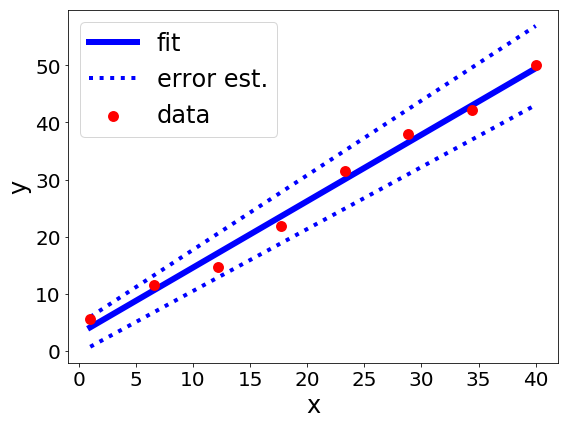

In [6]:
# Plotting the fit from our bootstrap method.

# first generate points for fitted function
n_fitpts=10
x_fit=np.linspace(np.min(x),np.max(x),n_fitpts)

# this is the best fit
y_fit=intercept_boot+slope_boot*x_fit

# fitting our lower value confidence boundary
y_fit_lower_conf=min_intercept_boot+min_slope_boot*x_fit
# fitting our upper value confidence boundary
y_fit_upper_conf=max_intercept_boot+max_slope_boot*x_fit

# Now generate plot
plt.figure(figsize = (8,6) )
# plot data as scatter plot,
plt.scatter(x,y,s=120,c='red',linewidth=0,label='data',zorder=2)

# plot fitted function, zorder = 1 < 2 so line underneath points
plt.plot(x_fit,y_fit,linewidth=6,c='blue', label='fit',zorder=1)

# plot estimates of lower and upper 
plt.plot(x_fit,y_fit_lower_conf,linewidth=4,c='blue',linestyle=':',zorder=1,label='error est.')
plt.plot(x_fit,y_fit_upper_conf,linewidth=4,c='blue',linestyle=':',zorder=1)
plt.xlabel('x',fontsize=24)
plt.ylabel('y',fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='upper left',fontsize=24)
plt.tight_layout()

plt.show()

Finally you can also calculate the errors for this line using the standard error like we did for the measurements of a quantity at the beginning of this notebook. Remember that these are error estimates and so should be treated as just that, estimates! One method may enclose the true values whilst another doesn't but that shouldn't be taken too seriously in this example case.


### Task 1 <a class="anchor" id="Task-1"></a>

Investigate what happens to the quality of the fits when you change the number of resamples the method undertakes and the interval of confidence is chosen. Make sure you understand what is happening in both of these cases and why it is happening.

## 4) Is this fitting function a reasonable choice? <a class="anchor" id="fitting-choice"></a>

So far we have looked at the problem:if we ASSUME that the data is a straight line plus noise, what are our estimates for the values of the two parameters, intercept and slope, that define a straight line. This error analysis says essentially NOTHING about whether this assumption that the data really is a straight line, is true or false. Therefore we could use one of these fitting functions and the data is really a power law and thus the function is inappropriate for that data.

Perhaps the best simple check on the assumption for the functional form we chose for fitting, here a straight line, is to plot the residuals, ie the y values of the data minus the y values from the fit, as a function of x. IF the data really are a straight line plus noise, these residuals should just be random noise, ie no trend to increase or decreases with x. However, if the straight line is not the correct functional form, they a pattern in the residuals may be apparent.

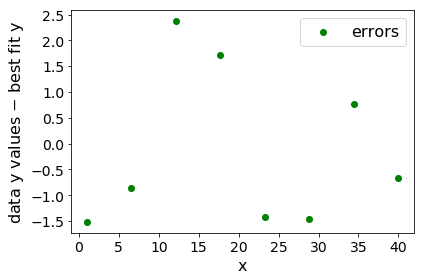

In [7]:
## plot errors to look for trend
#plt.figure(figsize = (10,6) )

# plot data as scatter plot,
#plt.title('if the fit function is correct or near correct should be no trend in residuals',fontsize=20)

# these are the error or residuals in y values
y_error=intercept_boot+slope_boot*x - y

plt.scatter(x,y_error,s=50,c='green',linewidth=0,label='errors',zorder=2)
plt.xlabel('x',fontsize=16)
plt.ylabel('data y values $-$ best fit y',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right',fontsize=16)
plt.tight_layout()
plt.show()

Since there is no trend to these residuals they look just like random noise, and what this means is that the data behind them must be a straight line because we subtracted from the noisy values our approximation of the linear fit and so if its a good fit (which ours is) it should leave only the noisy components behind. This process would work with any type of proposed fit, simply use the fit approximations and change the y_error to be calculated using the correct function (quadratic, power law, etc) and if you get left with only noisy residuals you will know you have an appropriate fit of the right type. Obviously there are more sophisticated ways to determine this as well.

Bear in mind since this is a random process and the errors are also generated using psuedo random numbers you could get a set that appears to have a trend so if thats the case try running the code again with a different seed, if this continues to happen then clealy something has gone wrong!

## 5) More Complex Regression - Fitting to a Gaussian <a class="anchor" id="gauss-fitting"></a>

This next section is similar to the last except it will be slightly more complx as before we were fitting to a straight line whereas now we will be fitting to a Gaussian. Fortunately we can still use the bootstrap method and again there are other python functions that can help to solve this problem for us. It can also be done using the least squares method but I am only going to demonstrate the bootstrap method - MAKE A TASK FOR DOING IT WITH LEAST SQUARES?



We will be going through all the same steps as before except this time rather than generating fake data I have it in a couple of arrays that are just in the notebook to keep it all self contained, in real uses its much more likely you will be reading the data in from a file.

In [8]:
from scipy.optimize import curve_fit

def gaussian_func(x,height,position,sigma):
    return height*np.exp(-(x-position)**2/(2.0*sigma**2))

# Normally read in data from a file
# data from estimation of pi via MC sampling of points inside a circle inside a square below
x_data=[  50.   ,        51.53061224  , 53.06122449  , 54.59183673 ,  56.12244898,
   57.65306122 ,  59.18367347 , 60.71428571  , 62.24489796  ,  63.7755102,
   65.30612245 ,  66.83673469 , 68.36734694  , 69.89795918  ,  71.42857143,
   72.95918367 , 74.48979592  , 76.02040816  , 77.55102041  ,  79.08163265,
   80.6122449  ,  82.14285714 , 83.67346939  , 85.20408163  ,  86.73469388,
   88.26530612 ,  89.79591837 , 91.32653061  , 92.85714286  ,  94.3877551,
   95.91836735 ,  97.44897959 , 98.97959184  , 100.51020408 , 102.04081633,
   103.57142857 , 105.10204082 , 106.63265306 , 108.16326531 , 109.69387755,
   111.2244898  , 112.75510204 , 114.28571429 , 115.81632653 , 117.34693878,
   118.87755102 , 120.40816327 , 121.93877551 , 123.46938776 , 125.        ]
y_data=[  0.41377014 , -0.10495414 ,  0.37255293 ,  0.26160277 ,  0.08531372,
   0.34715966 , -0.54373545 ,  0.59889123 ,  0.01978427 , -0.54756711,
   0.0892631  , -0.39457362 ,  0.07430636 , -0.07620115 ,  0.61989377,
   0.55593698 ,  0.75163735 ,  0.76190345 , 2.26667747  , 1.73804388,
   3.30464748 ,  4.00552216 ,  5.45293876 ,  6.71058821 ,  7.30607101,
   8.56485589 , 10.2379816  , 10.93286798 , 11.55973729 , 12.66000605,
   12.2887081 , 11.58690386 , 10.9312787  ,  9.84442584 ,  9.07739439,
   7.79123061 ,  6.56966095 ,  5.49730277 ,  4.07648624 ,  2.89846001,
   2.29716244 ,  2.05079322 ,  1.07223863 ,  0.75650926 ,  0.56840469,
   0.12592929 ,  0.2472852  , -0.11232582 , -0.42348725 , -0.0497708 ]

n_pts=len(x_data)
print('data has ',n_pts,' points')
print(x_data)
print(y_data)

data has  50  points
[50.0, 51.53061224, 53.06122449, 54.59183673, 56.12244898, 57.65306122, 59.18367347, 60.71428571, 62.24489796, 63.7755102, 65.30612245, 66.83673469, 68.36734694, 69.89795918, 71.42857143, 72.95918367, 74.48979592, 76.02040816, 77.55102041, 79.08163265, 80.6122449, 82.14285714, 83.67346939, 85.20408163, 86.73469388, 88.26530612, 89.79591837, 91.32653061, 92.85714286, 94.3877551, 95.91836735, 97.44897959, 98.97959184, 100.51020408, 102.04081633, 103.57142857, 105.10204082, 106.63265306, 108.16326531, 109.69387755, 111.2244898, 112.75510204, 114.28571429, 115.81632653, 117.34693878, 118.87755102, 120.40816327, 121.93877551, 123.46938776, 125.0]
[0.41377014, -0.10495414, 0.37255293, 0.26160277, 0.08531372, 0.34715966, -0.54373545, 0.59889123, 0.01978427, -0.54756711, 0.0892631, -0.39457362, 0.07430636, -0.07620115, 0.61989377, 0.55593698, 0.75163735, 0.76190345, 2.26667747, 1.73804388, 3.30464748, 4.00552216, 5.45293876, 6.71058821, 7.30607101, 8.56485589, 10.2379816, 

First we import a function curve_fit that we will be using later on, we have our gaussian data (you can plot it to check it is gaussian if you wish) and we have also defined our basic Gaussian function that we will use to plot our fit later.

The next thing is that we want to use a function to fit to our data and as I discussed above we will be using the bootstrap method to do this.

However we can't use the exact same function as we wrote for the linear fitting, we need to tweek it somewhat which is what I am doing in this next code block:

In [9]:
def bootstrap_calc(prob_conf_interval,x,y):
# here I have set the number of times the resampled to 100, this kind of overkill - making it 100 does not change the
# error estimates much - but as the program runs so quickly it would not run noticeably faster if n_bootstrap
# is reduced so might as well make n_bootstrap large
    n_bootstrap=1000
    n_pts = len(x)
    boot_height=np.zeros(n_bootstrap)
    boot_position=np.zeros(n_bootstrap)
    boot_width=np.zeros(n_bootstrap)
    
    for i in range(0,n_bootstrap):
        x_boot=np.zeros(n_pts)
        y_boot=np.zeros(n_pts)
        for j in range(0,n_pts):
            i_sample=np.random.randint(0,n_pts-1)
            x_boot[j]=x[i_sample]
            y_boot[j]=y[i_sample]
          
        # getting guessing parameters for the curve_fit function
        # initial guess of Gaussian height is largest y value
        guess_height=np.amax(y_boot)
        # initial guess of position is corresponding to largest y value
        guess_position=x_boot[np.argmax(y_boot)]
        # initial guess of width is 0.5*area/height
        area=(np.sum(y_boot)/float(n_pts))*(np.amax(x_boot)-np.amin(x_boot))
        guess_width=0.5*area/guess_height
        param_guess=[guess_height,guess_position,guess_width]
        
        fit_params, std_error_array = curve_fit(gaussian_func,x_boot,y_boot,p0=param_guess)
        boot_height[i],boot_position[i],boot_width[i] = fit_params
        
# sort so later we pick out values near bottom and top
    boot_height=np.sort(boot_height)
    boot_position=np.sort(boot_position)
    boot_width=np.sort(boot_width)
    
# now n_bootstrap values are sorted from smallest to largest
    f_lower=(1.0-prob_conf_interval)/2.0
    f_upper=1.0-f_lower
    print('lower and upper limits to confidence interval ',format(f_lower,"4.2f"),'&',format(f_upper,"4.2f"))
    
# 95% level confidence - 95% is just a reasonable but basically arbitrary choice
    n_boot_lower_conf=int(float(n_bootstrap)*f_lower)
    n_boot_upper_conf=int(float(n_bootstrap)*f_upper)
    min_boot_height=boot_height[n_boot_lower_conf]
    av_boot_height = np.mean(boot_height)
    max_boot_height=boot_height[n_boot_upper_conf]
    min_boot_position=boot_position[n_boot_lower_conf]
    av_boot_position = np.mean(boot_position)
    max_boot_position=boot_position[n_boot_upper_conf]
    min_boot_width=boot_width[n_boot_lower_conf]
    av_boot_width = np.mean(boot_width)
    max_boot_width=boot_width[n_boot_upper_conf]
    
    # returns a tuple of tuples - height/position/width then within each min/mean/max
    result_tuple = ( 
        (min_boot_height, av_boot_height, max_boot_height),
        (min_boot_position, av_boot_position, max_boot_position),
        (min_boot_width, av_boot_width, max_boot_width) )
    return result_tuple

Now call this function to get the results, hopefully the confidence interval of the slope will include what we expect to be the true value $=-1/2$.

You'll notice this function is only slightly different which is good since it means it is easily adaptable. The main difference being that we use a function curve_fit that we have imported from the SciPy.optimize package, this function (unsurprisingly) is used to fit to a curve. It uses the non-linear least squares method to fit a function you give it to a set of data.

In [10]:
# Bootstrap estimates for statistical error bounds
# making this closer to 1 makes interval larger - more conservative error estimates
prob_conf_interval=0.95
print('estimate that',format(prob_conf_interval*100.0,"4.1f"),'% of the bootstrap sampled values fall with the confidence interval')

# unpacking results
height_results, position_results, width_results = bootstrap_calc(prob_conf_interval,x_data,y_data)
min_boot_height, fit_height, max_boot_height = height_results
min_boot_position, fit_position, max_boot_position = position_results
min_boot_width, fit_width, max_boot_width = width_results

print('')
print('after boootstrap error analysis the data constrains the fit parameters to ranges:')
print('best fit value of height      ',format(fit_height,"5.2f"),format(prob_conf_interval*100.0,"5.1f"),
      '% conf. interval ',format(min_boot_height,"5.2f"),' to ',format(max_boot_height,"5.2f"))
print('best fit value of position    ',format(fit_position,"5.2f"),format(prob_conf_interval*100.0,"5.1f"),
      '% conf. interval ','%5.2f'%(min_boot_position),' to ','%5.2f'%(max_boot_position))
print('best fit value of width       ',format(fit_width,"5.2f"),format(prob_conf_interval*100.0,"5.1f"),
      '% conf. interval ','%5.2f'%(min_boot_width),' to ','%5.2f'%(max_boot_width))

estimate that 95.0 % of the bootstrap sampled values fall with the confidence interval
lower and upper limits to confidence interval  0.03 & 0.97

after boootstrap error analysis the data constrains the fit parameters to ranges:
best fit value of height       12.15  95.0 % conf. interval  11.95  to  12.39
best fit value of position     95.20  95.0 % conf. interval  95.03  to  95.37
best fit value of width         8.82  95.0 % conf. interval   8.63  to   9.00


Now that we have our fit we can plot it to determine how well our bootstrap has worked which we will do in the box below:

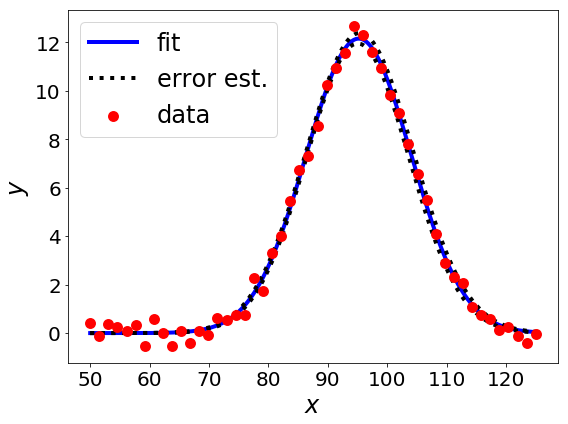

In [11]:
# first generate points for fitted function
n_fitpts=1000
x_fit=np.linspace(np.min(x_data),np.max(x_data),n_fitpts)
# this is the best fit
y_fit=gaussian_func(x_fit,fit_height,fit_position,fit_width)

# error estimates - plotted but lie so close to the curve they overlap (excellent fit)
y_fit_lower_conf = gaussian_func(x_fit, min_boot_height, min_boot_position, min_boot_width)
y_fit_upper_conf = gaussian_func(x_fit, max_boot_height, max_boot_position, max_boot_width)

######### Now generate plot
plt.figure(figsize = (8,6) )
# plot data as scatter plot,
plt.scatter(x_data,y_data,s=120,color='red',linewidth=0,label='data',zorder=2)
# plot fitted function, zorder = 1 < 2 so line underneath points
plt.plot(x_fit,y_fit,linewidth=4,color='blue', label='fit',zorder=1)
plt.plot(x_fit,y_fit_lower_conf,linewidth=4,c='black',linestyle=':',zorder=1,label='error est.')
plt.plot(x_fit,y_fit_upper_conf,linewidth=4,c='black',linestyle=':',zorder=1)
plt.xlabel('$x$',fontsize=24)
plt.ylabel('$y$',fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='upper left',fontsize=24)
plt.tight_layout()

# display plot on screen
plt.show()

As we can see our method has produced us a very good fit for this data. This shows the power of bootstrapping and fitting functions in Python!

Again we can test if its an appropriate method of fitting by the noise in the data after we subtract our fit values. We should expect to see only noise with no trend like how we did for the linear fit. 
